## Assignment A3a: Signals and Noise

#### John Mays, (jkm100)

In [1]:
# Some important imports
import numpy as np
import sys

In [2]:
sys.path.insert(1, '/Users/johnmays/Documents/GitHub/CSDS_364_HW/A1')
from A1b_jkm100 import *
from A3a_jkm100 import *

### 1. Continuous signals and sampling

### 1a. Sampled functions

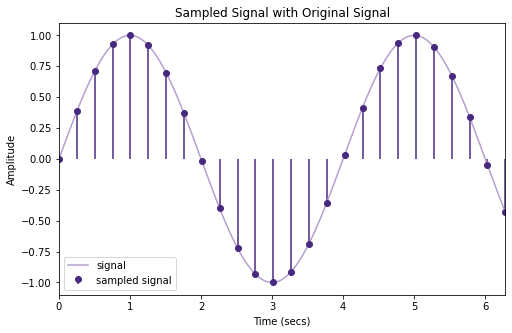

In [3]:
plot_sampled_function(g=sinewave, f= 0.25, fs=4.0)

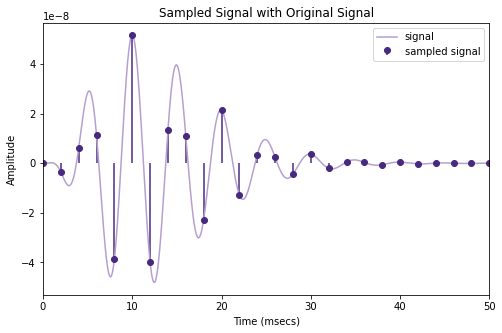

In [4]:
plot_sampled_function(g=gammatone, f=200, fs=500, tlim=(0,0.05),\
    tscale=10**3, tunits="msecs")

### 1b. The Nyquist frequency and aliasing

##### 1. A sine wave below Nyquist at a frequency that shows a few samples per period which unevenly distributed.

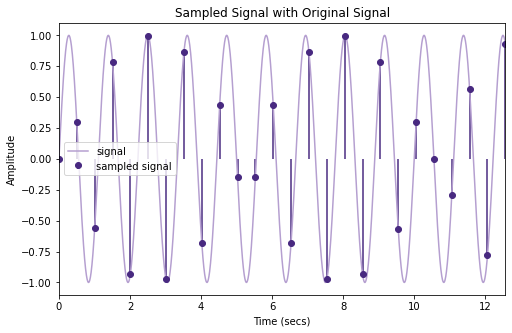

In [5]:
plot_sampled_function(g=sinewave, f= 0.9, fs=2.0, tlim=(0, 4*math.pi))

##### 2. sine at Nyquist

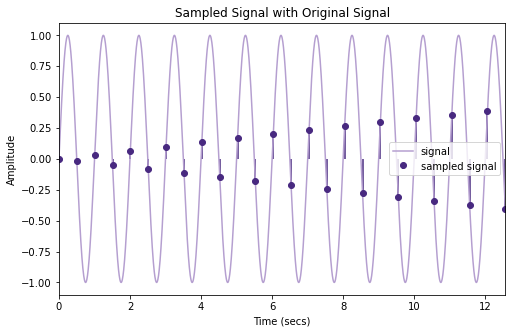

In [6]:
plot_sampled_function(g=sinewave, f= 1.0, fs=2.0, tlim=(0, 4*math.pi))

##### 3. cosine at Nyquist

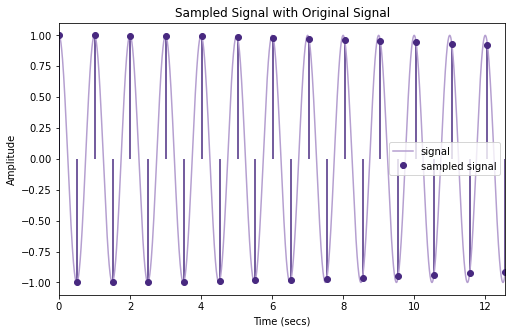

In [7]:
plot_sampled_function(g=cosinewave, f= 1.0, fs=2.0, tlim=(0, 4*math.pi))

##### 4. cosine sampled above Nyquist frequency that clearly shows aliasing

What does it mean to sample just above the Nyquist frequency if the Nyquist frequency is solely determined by the sampling frequency?  I am going to assume it was meant that the frequency of the actual wave should be just above the Nyquist frequency.

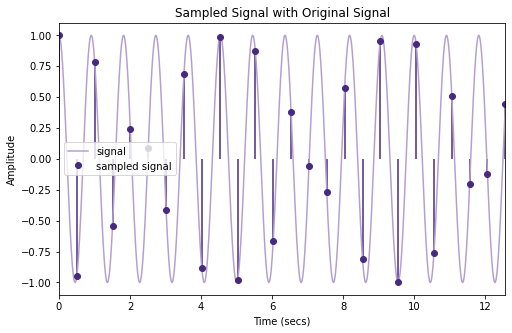

In [8]:
plot_sampled_function(g=cosinewave, f= 1.1, fs=2.0, tlim=(0, 4*math.pi))

### 2. Signals

### 2a. Delta and step functions

### 2b. `gensignal`

Example from the instructions:

In [9]:
t = np.linspace(0, 4, 5)
print(t)
signal = gensignal(t, lambda t: u(t), tau=0, T=2)
print(signal)

[0. 1. 2. 3. 4.]
[1 1 0 0 0]


### 3. Noise and SNR


### 3a. `energy`, `power`, and `snr`

Defined in `A3a_jkm100.py`, demonstrated in the following questions.

### 3b. Noisy signals

In [10]:
print(noisysignal(1, g = lambda t: sinewave(t, f=2.0), tau = 0.25, T=1))

-0.09917510613040831


Example with a sinewave:

t-tau is = 0 at t=0.25


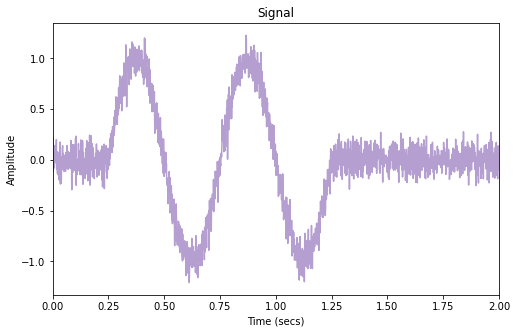

In [11]:
plotsignal(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0),\
    tau = 0.25, T=1, sigma=0.1), tlim=(0,2))

Example with a gammatone:

t-tau is = 0 at t=0.015


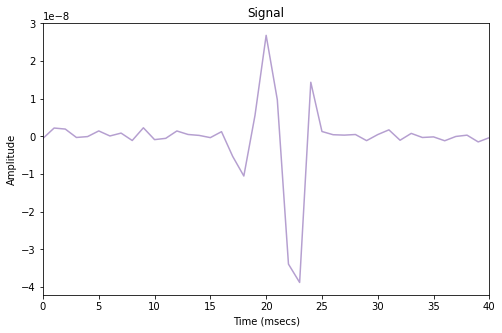

In [12]:
plotsignal(g= lambda t: noisysignal(t, lambda x: gammatone(x, f=200),\
    tau = 0.015, T=0.010, sigma=10**-9), tlim=(0,0.04), tscale=10**3,\
    tunits="msecs")

Example with a step:

t-tau is = 0 at t=0.5


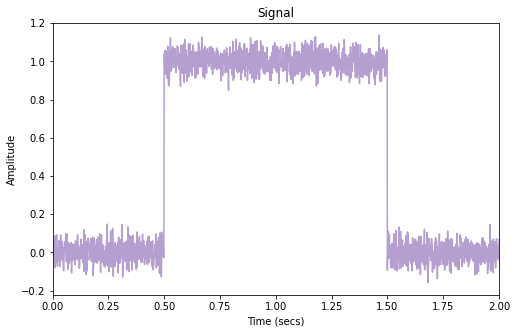

In [13]:
plotsignal(g= lambda t: noisysignal(t, lambda x: u(x), tau = 0.50,\
    T=1, sigma=0.05), tlim=(0,2))

### 3c. Noise level specified by SNR

##### Calculating the signal $\sigma$ with consideration to the range of the signal

Sigma for 10dB SNR: 0.07071067811865475
t-tau is = 0 at t=0.25


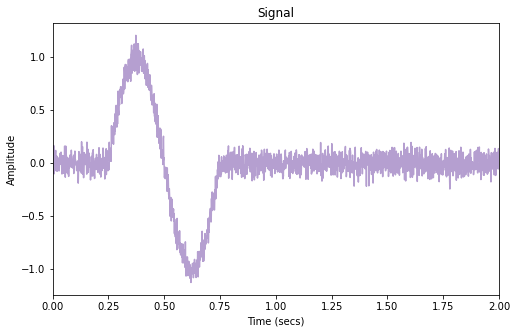

In [14]:
t = np.linspace(0,2,2001)
signal = gensignal(t, lambda t: sinewave(t, f=2.0), tau=0.25, T=0.5)
sigma_n = snr2sigma(signal, xrange=(250, 750), snr=20)
print("Sigma for 10dB SNR: " + str(sigma_n))
plotsignal(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0),\
    tau = 0.25, T=0.5, sigma=sigma_n), tlim=(0,2))

##### Calculating the signal $\sigma$ *without* consideration to the range of the signal

Sigma for 10dB SNR: 0.035346503537745114
t-tau is = 0 at t=0.25


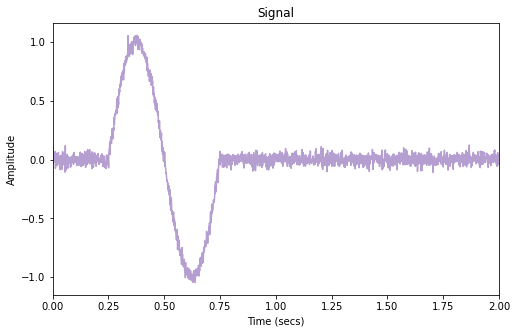

In [15]:
t = np.linspace(0,2,2001)
signal = gensignal(t, lambda t: sinewave(t, f=2.0), tau=0.25, T=0.5)
sigma_n = snr2sigma(signal, snr=20)
print("Sigma for 10dB SNR: " + str(sigma_n))
plotsignal(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0),\
    tau = 0.25, T=0.5, sigma=sigma_n), tlim=(0,2))

Sampling over the entire range even when there is not a signal produces a lower power value for the signal, and therefore a lower signal-to-noise ratio.  Notice in the second graph how the noise $\sigma$ is much lower and the therefore the noise is less visually present.

### 3d. Estimating SNR

First, I estimate a $\sigma_{n}$ to achieve an SNR of 10:

In [16]:
signal = gensignal(t, lambda t: sinewave(t, f=100), tau=0.0, T=0.1)
sigma_n = snr2sigma(signal, snr=10)
print("estimated sigma of the noise for an SNR of 10: " + str(sigma_n))

estimated sigma of the noise for an SNR of 10: 0.049987504685547746


This creates a noisy sine wave from 0.25 to 0.75 seconds using $\sigma_n$ for noise, and checks for the range of the present signal with `extent()` using $\theta = 0.33$

In [17]:
t = np.linspace(0,2,2001)
signal = noisysignal(t, lambda t: sinewave(t, f=2.0), tau=0.25, T=0.5,\
    sigma=sigma_n)
lower_signal_bound, upper_signal_bound = extent(signal, theta = 0.33)
print("estimated signal range: " + str(lower_signal_bound) + ", "\
    + str(upper_signal_bound))

estimated signal range: 277, 724


Now I use this to estimate the average power of the noise and the average power of the signal to estimate an SNR:

In [18]:
just_signal = signal[lower_signal_bound:upper_signal_bound]
just_noise = signal[0:lower_signal_bound]\
    + signal[upper_signal_bound:len(signal)]
Ps = power(just_signal)
Pn = power(just_noise)
est_SNR = snr(Ps=Ps, Pn=Pn)
print("Estimated SNR: " + str(est_SNR))

Estimated SNR: 21.75940551527241


The thresholding does not do a spectacular job, but it gets sort of close to what one would expect.

### 4. Grand synthesis

In [ ]:
def compose_sound():
    